<a href="https://colab.research.google.com/github/GRACOPORDEUS/atividades_mestrado/blob/main/1107106_220427_lista1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

from itertools import product
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

### Questão 1

**Criando base de dados**

In [4]:
def func_classesQ1(df):

  x = df[0]
  y = df[1]
  z = df[2]

  if (x <= 0.1) & (y <= 0.1) & (z <= 0.1): Classe = 1
  elif (x <= 0.1) & (y <= 0.1) & (z >= 0.9): Classe = 2
  elif (x <= 0.1) & (y >= 0.9) & (z <= 0.1): Classe = 3
  elif (x <= 0.1) & (y >= 0.9) & (z >= 0.9): Classe = 4
  elif (x >= 0.9) & (y <= 0.1) & (z <= 0.1): Classe = 5
  elif (x >= 0.9) & (y <= 0.1) & (z >= 0.9): Classe = 6
  elif (x >= 0.9) & (y >= 0.9) & (z <= 0.1): Classe = 7
  elif (x >= 0.9) & (y >= 0.9) & (z >= 0.9): Classe = 8
  else: Classe = 0

  return Classe

Dados de treino

In [63]:
top_x = np.arange(0.8, 1, 0.01)
top_y = np.arange(0.8, 1, 0.01)
top_z = np.arange(0.8, 1, 0.01)
bot_x = np.arange(0, 0.2, 0.01)
bot_y = np.arange(0, 0.2, 0.01)
bot_z = np.arange(0, 0.2, 0.01)

x = np.array([top_x, bot_x])
y = np.array([top_y, bot_y])
z = np.array([top_z, bot_z])

In [80]:
vertices = pd.DataFrame(product(x, y, z), columns=["x", "y", "z"]) \
    .explode("x") \
    .explode("y") \
    .explode("z") \
    .drop_duplicates() \
    .reset_index(drop=True)

vertices["classes"] = ""

In [81]:
for i in range(len(vertices)):
  df = vertices.loc[i]
  vertices.classes[i] = func_classesQ1(df)

Dados de teste

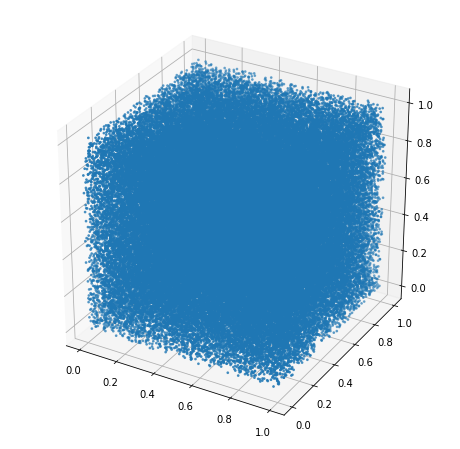

In [118]:
fig = plt.figure()
fig.set_size_inches(8, 8)

ax = plt.axes(projection="3d")

x_data = np.random.uniform(0, 100, (100000,))/100
y_data = np.random.uniform(0, 100, (100000,))/100
z_data = np.random.uniform(0, 100, (100000,))/100

ax.scatter(x_data, y_data, z_data, s = 3)

In [119]:
d = {"x": x_data, 
     "y": y_data, 
     "z": z_data}

test = pd.DataFrame(data = d)
test["y_test"] = ""

In [120]:
for i in range(len(test)):
  df = test.loc[i]
  test.y_test[i] = func_classesQ1(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


**Modelagem**

In [87]:
X_train = tf.convert_to_tensor(vertices[["x","y","z"]].astype('float'))
y_train = tf.convert_to_tensor(vertices[["classes"]].astype('int'))
y_train = to_categorical(y_train)

In [127]:
model = keras.Sequential([
    keras.layers.Dense(units=1, input_dim=3 , activation='relu'),
    keras.layers.Dense(units=9, activation='softmax')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
    )

In [128]:
model.fit(X_train, 
          y_train,
          batch_size = 1,
          epochs = 1)

64000/64000 [==============================] - 83s 1ms/step - loss: 0.1471 - accuracy: 0.8521


Testando

In [129]:
X_test = tf.convert_to_tensor(test[["x","y","z"]].astype('float'))
y_test = np.array(test[["y_test"]].astype('int'))

In [130]:
y_pred = model.predict(X_test, verbose=0)

In [123]:
np.argmax(y_test, axis=-1).shape , np.argmax(y_pred, axis=-1).shape

((100000,), (100000,))

In [131]:
print(accuracy_score(np.argmax(y_test, axis=-1), np.argmax(y_pred, axis=-1)))

1.0


In [125]:
plot_test = test[test["y_test"] != 0]

plot_pred = test
plot_pred["y_pred"] = np.argmax(y_pred, axis=-1)
plot_pred = plot_pred[plot_pred["y_pred"] != 0]
plot_pred = plot_pred[plot_pred["y_pred"] != plot_pred["y_test"]]

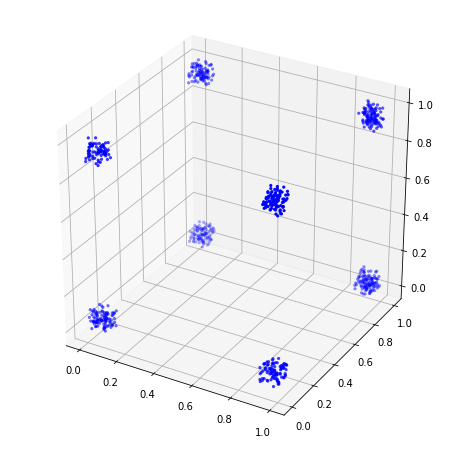

In [126]:
fig = plt.figure()
fig.set_size_inches(8, 8)

ax = fig.add_subplot(projection='3d')

ax.scatter(plot_test.x, 
           plot_test.y, 
           plot_test.z,
           color='blue',
           linewidth=0.01,
           s = 10)

ax.scatter(plot_pred.x, 
           plot_pred.y, 
           plot_pred.z,
           color='orange',
           linewidth=0.01,
           s = 20)

plt.show()

### Questão 3

Criação da base de treino

In [135]:
def func_question3(n):
  x = np.random.uniform(-1,1,n)
  y = np.random.uniform(-1,1,n)

  df = pd.DataFrame(data={"x":[1.0], "y":[0.1], "Class":[1]})

  for i in range(n):
    if (y[i]<=1-x[i]) & (x[i]>=0) & (y[i]>=0): df.loc[len(df)] = [x[i],y[i],1]
    elif (y[i]<=x[i]+1) & (x[i]<=0) & (y[i]>=0): df.loc[len(df)] = [x[i],y[i],2]
    elif (y[i]>=-x[i]-1) & (x[i]<=0) & (y[i]<=0): df.loc[len(df)] = [x[i],y[i],3]
    elif (y[i]>=x[i]-1) & (x[i]>=0) & (y[i]<=0): df.loc[len(df)] = [x[i],y[i],4]
    elif (y[i]>=1-x[i]) & (x[i]>=0) & (y[i]>=0) & (x[i]**2+y[i]**2<=1): df.loc[len(df)] = [x[i],y[i],5]
    elif (y[i]>=x[i]+1) & (x[i]<=0) & (y[i]>=0) & (x[i]**2+y[i]**2<=1): df.loc[len(df)] = [x[i],y[i],6]
    elif (y[i]<=-x[i]-1) & (x[i]<=0) & (y[i]<=0) & (x[i]**2+y[i]**2<=1): df.loc[len(df)] = [x[i],y[i],7]
    elif (y[i]<=x[i]-1) & (x[i]>=0) & (y[i]<=0) & (x[i]**2+y[i]**2<=1): df.loc[len(df)] = [x[i],y[i],8]
  
  return df

In [136]:
df = func_question3(10000)

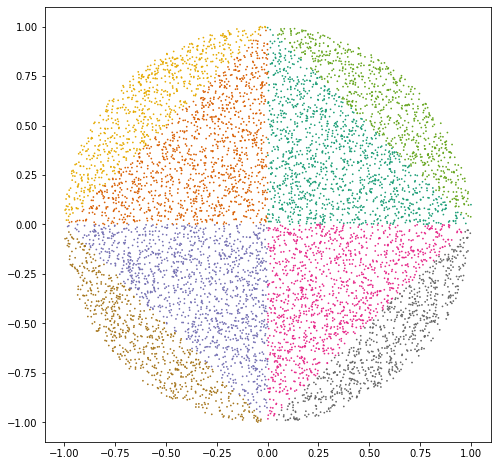

In [228]:
fig = plt.figure()
fig.set_size_inches(8, 8)
plt.scatter(df.x,
            df.y,
            c=df["Class"], 
            cmap= "Dark2",
            s = 0.5)

In [175]:
split_index = np.random.rand(len(df)) <= 0.7
train_df = df[split_index]
test_df = df[~split_index]

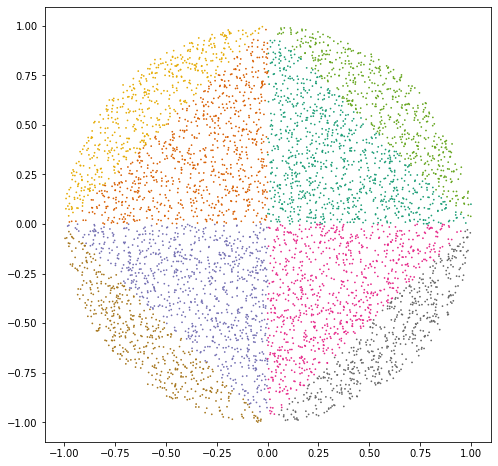

In [229]:
fig = plt.figure()
fig.set_size_inches(8, 8)
plt.scatter(train_df.x,
            train_df.y,
            c=train_df["Class"], 
            cmap= "Dark2",
            s = 0.5)

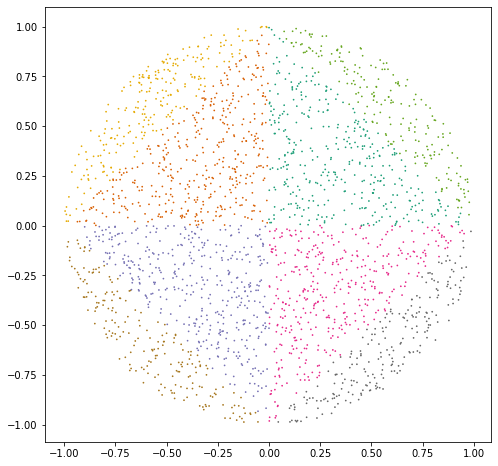

In [230]:
fig = plt.figure()
fig.set_size_inches(8, 8)
plt.scatter(test_df.x,
            test_df.y,
            c=test_df["Class"], 
            cmap= "Dark2",
            s = 0.5)

In [177]:
X_train = tf.convert_to_tensor(train_df[["x","y"]].astype('float'))
y_train = tf.convert_to_tensor(train_df[["Class"]].astype('int'))
y_train = to_categorical(y_train)

In [178]:
X_test = tf.convert_to_tensor(test_df[["x","y"]].astype('float'))
y_test = np.array(test_df[["Class"]].astype('int'))

Modelagem

#### Rede básica

In [153]:
model_normal = keras.Sequential([
    keras.layers.Dense(units=1, input_dim=2 , activation='relu'),
    keras.layers.Dense(units=9, activation='softmax')
])

model_normal.compile(
    loss='binary_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
    )

Epoch 1/20
328/328 - 1s - loss: 0.3308 - accuracy: 0.1666 - val_loss: 0.3303 - val_accuracy: 0.1828 - 1s/epoch - 3ms/step
Epoch 2/20
328/328 - 1s - loss: 0.3308 - accuracy: 0.1666 - val_loss: 0.3303 - val_accuracy: 0.1828 - 837ms/epoch - 3ms/step
Epoch 3/20
328/328 - 1s - loss: 0.3308 - accuracy: 0.1666 - val_loss: 0.3303 - val_accuracy: 0.1828 - 572ms/epoch - 2ms/step
Epoch 4/20
328/328 - 1s - loss: 0.3308 - accuracy: 0.1666 - val_loss: 0.3303 - val_accuracy: 0.1828 - 591ms/epoch - 2ms/step
Epoch 5/20
328/328 - 1s - loss: 0.3308 - accuracy: 0.1666 - val_loss: 0.3303 - val_accuracy: 0.1828 - 617ms/epoch - 2ms/step
Epoch 6/20
328/328 - 1s - loss: 0.3308 - accuracy: 0.1666 - val_loss: 0.3303 - val_accuracy: 0.1828 - 601ms/epoch - 2ms/step
Epoch 7/20
328/328 - 1s - loss: 0.3308 - accuracy: 0.1666 - val_loss: 0.3303 - val_accuracy: 0.1828 - 573ms/epoch - 2ms/step
Epoch 8/20
328/328 - 1s - loss: 0.3308 - accuracy: 0.1666 - val_loss: 0.3303 - val_accuracy: 0.1828 - 588ms/epoch - 2ms/step
Epo

<function matplotlib.pyplot.show>

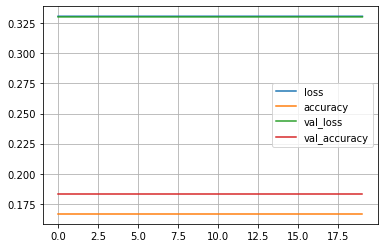

In [340]:
model = model_normal.fit(
    X_train, 
    y_train,
    shuffle = True,
    validation_split = 0.1,
    batch_size = 15,
    epochs = 20,
    verbose = 2
    )

df_model = pd.DataFrame(model.history)
df_model.plot()
plt.grid(True)
plt.show

0.14820913956360643


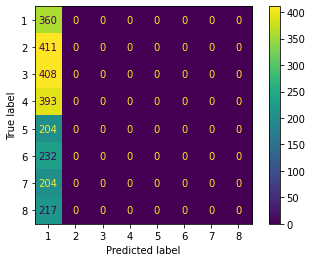

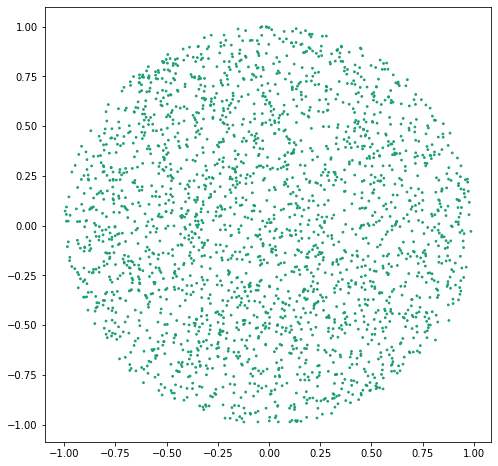

In [258]:
y_pred_normal = model_normal.predict(X_test, verbose=0)

conf_matrix = confusion_matrix(
    y_true = y_test,
    y_pred = np.argmax(y_pred_normal, axis=-1)
    )

labels = np.unique(y_test)

print(accuracy_score(y_test, np.argmax(y_pred_normal, axis=-1)))
plot_cm = ConfusionMatrixDisplay(
    confusion_matrix = conf_matrix,
    display_labels = labels
    ) \
    .plot()

plt.show()

fig = plt.figure()
fig.set_size_inches(8, 8)
plt.scatter(test_df.x,
            test_df.y,
            c=np.argmax(y_pred_normal, axis=-1), 
            cmap= "Dark2",
            s = 3)

#### Rede com momentum

In [335]:
model_momentum = keras.Sequential([
    keras.layers.Dense(units=1, input_dim=2 , activation='relu', kernel_initializer="he_normal"),
    keras.layers.Dense(units=9, activation='softmax')
])

opt = keras.optimizers.SGD(
    learning_rate=0.001, 
    momentum=0.9, 
    nesterov=True
    )

model_momentum.compile(
    loss='binary_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
    )

Epoch 1/20
328/328 - 0s - loss: 0.2923 - accuracy: 0.3259 - val_loss: 0.2922 - val_accuracy: 0.3346 - 472ms/epoch - 1ms/step
Epoch 2/20
328/328 - 0s - loss: 0.2920 - accuracy: 0.3282 - val_loss: 0.2918 - val_accuracy: 0.3346 - 466ms/epoch - 1ms/step
Epoch 3/20
328/328 - 0s - loss: 0.2916 - accuracy: 0.3294 - val_loss: 0.2914 - val_accuracy: 0.3327 - 459ms/epoch - 1ms/step
Epoch 4/20
328/328 - 0s - loss: 0.2913 - accuracy: 0.3296 - val_loss: 0.2911 - val_accuracy: 0.3309 - 454ms/epoch - 1ms/step
Epoch 5/20
328/328 - 0s - loss: 0.2910 - accuracy: 0.3306 - val_loss: 0.2907 - val_accuracy: 0.3309 - 481ms/epoch - 1ms/step
Epoch 6/20
328/328 - 0s - loss: 0.2906 - accuracy: 0.3318 - val_loss: 0.2904 - val_accuracy: 0.3364 - 409ms/epoch - 1ms/step
Epoch 7/20
328/328 - 0s - loss: 0.2903 - accuracy: 0.3337 - val_loss: 0.2900 - val_accuracy: 0.3327 - 451ms/epoch - 1ms/step
Epoch 8/20
328/328 - 0s - loss: 0.2900 - accuracy: 0.3343 - val_loss: 0.2897 - val_accuracy: 0.3327 - 475ms/epoch - 1ms/step


<function matplotlib.pyplot.show>

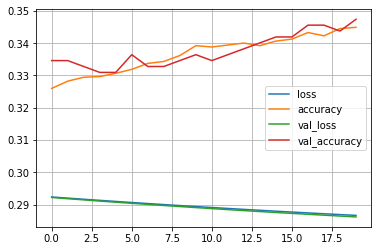

In [341]:
model = model_momentum.fit(
    X_train, 
    y_train,
    shuffle = True,
    validation_split = 0.1,
    batch_size = 15,
    epochs = 20,
    verbose = 2
    )

df_model = pd.DataFrame(model.history)
df_model.plot()
plt.grid(True)
plt.show

0.3668176204199259


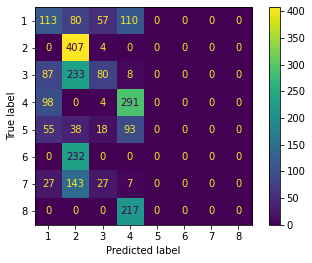

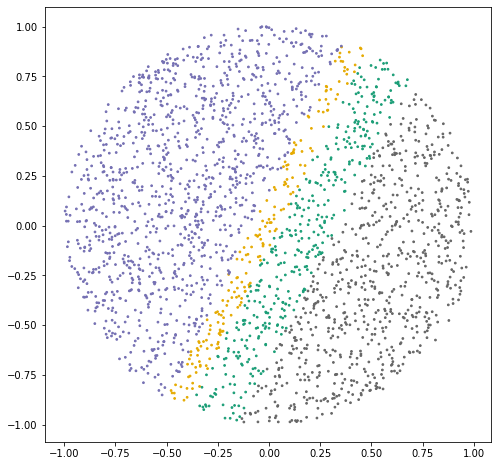

In [342]:
y_pred_momentum = model_momentum.predict(X_test, verbose=0)

conf_matrix = confusion_matrix(
    y_true = y_test,
    y_pred = np.argmax(y_pred_momentum, axis=-1)
    )

labels = np.unique(y_test)

print(accuracy_score(y_test, np.argmax(y_pred_momentum, axis=-1)))
plot_cm = ConfusionMatrixDisplay(
    confusion_matrix = conf_matrix,
    display_labels = labels
    ) \
    .plot()

plt.show()

fig = plt.figure()
fig.set_size_inches(8, 8)
plt.scatter(test_df.x,
            test_df.y,
            c=np.argmax(y_pred_momentum, axis=-1), 
            cmap= "Dark2",
            s = 3)

#### Teste com rede mais robusta

In [322]:
model_momentum_power = keras.Sequential([
    keras.layers.Flatten(input_dim=2),
    keras.layers.Dense(units=9, activation='relu', kernel_initializer="he_normal"),
    keras.layers.Dense(units=100, activation='relu', kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(units=100, activation='relu', kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),               
    keras.layers.Dense(units=9, activation='softmax')
])

opt = keras.optimizers.SGD(
    learning_rate=0.0005, 
    momentum=0.9, 
    nesterov=True
    )

model_momentum_power.compile(
    loss='binary_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
    )

Epoch 1/10
328/328 - 1s - loss: 0.1983 - accuracy: 0.8301 - val_loss: 0.1693 - val_accuracy: 0.8958 - 605ms/epoch - 2ms/step
Epoch 2/10
328/328 - 1s - loss: 0.1812 - accuracy: 0.8417 - val_loss: 0.1537 - val_accuracy: 0.9068 - 583ms/epoch - 2ms/step
Epoch 3/10
328/328 - 1s - loss: 0.1686 - accuracy: 0.8378 - val_loss: 0.1418 - val_accuracy: 0.9104 - 599ms/epoch - 2ms/step
Epoch 4/10
328/328 - 1s - loss: 0.1582 - accuracy: 0.8476 - val_loss: 0.1319 - val_accuracy: 0.9250 - 581ms/epoch - 2ms/step
Epoch 5/10
328/328 - 1s - loss: 0.1482 - accuracy: 0.8505 - val_loss: 0.1242 - val_accuracy: 0.9305 - 575ms/epoch - 2ms/step
Epoch 6/10
328/328 - 1s - loss: 0.1398 - accuracy: 0.8625 - val_loss: 0.1151 - val_accuracy: 0.9305 - 593ms/epoch - 2ms/step
Epoch 7/10
328/328 - 1s - loss: 0.1321 - accuracy: 0.8629 - val_loss: 0.1068 - val_accuracy: 0.9250 - 560ms/epoch - 2ms/step
Epoch 8/10
328/328 - 1s - loss: 0.1261 - accuracy: 0.8708 - val_loss: 0.1018 - val_accuracy: 0.9342 - 589ms/epoch - 2ms/step


<function matplotlib.pyplot.show>

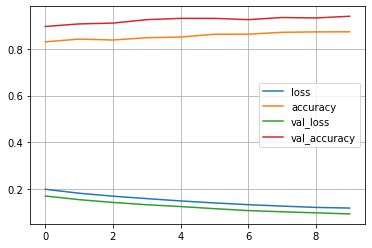

In [325]:
model = model_momentum_power.fit(
    X_train, 
    y_train,
    shuffle = True,
    validation_split = 0.1,
    batch_size = 15,
    epochs = 10,
    verbose = 2
    )

df_model = pd.DataFrame(model.history)
df_model.plot()
plt.grid(True)
plt.show

0.9526554137505147


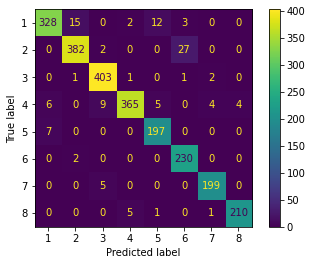

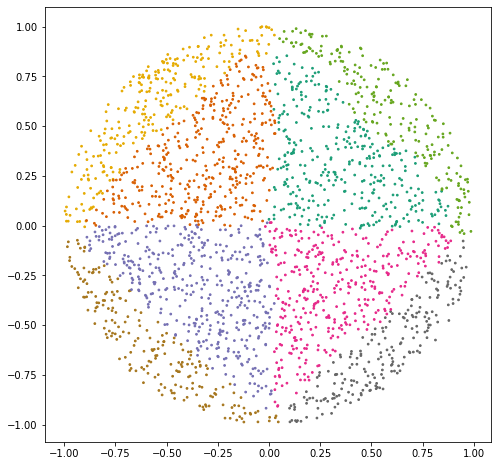

In [326]:
y_pred_momentum2 = model_momentum_power.predict(X_test, verbose=0)

conf_matrix = confusion_matrix(
    y_true = y_test,
    y_pred = np.argmax(y_pred_momentum2, axis=-1)
    )

labels = np.unique(y_test)

print(accuracy_score(y_test, np.argmax(y_pred_momentum2, axis=-1)))
plot_cm = ConfusionMatrixDisplay(
    confusion_matrix = conf_matrix,
    display_labels = labels
    ) \
    .plot()

plt.show()

fig = plt.figure()
fig.set_size_inches(8, 8)
plt.scatter(test_df.x,
            test_df.y,
            c=np.argmax(y_pred_momentum2, axis=-1), 
            cmap= "Dark2",
            s = 3)

### Questão 4

x(n) = sen
2
(n) + cos(n+cos(n)).

In [5]:
def func_question4(x):
  output = np.sin(x)**2+np.cos(x+np.cos(x))
  return output

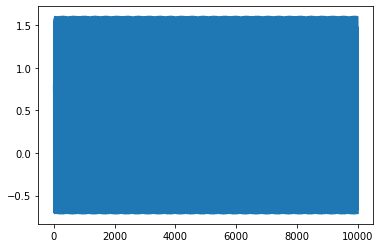

In [127]:
arr = np.arange(1,10001,1)

df = func_question4(arr)

plt.plot(range(len(df)), df)
plt.show()

In [144]:
a = df.reshape(10000, 1)
a = a[:9990]
for i in range(1,9):
  temp = df.reshape(10000, 1)
  temp = temp[i:9990+i]
  a = np.concatenate((a, temp), axis = 1)

y = a[9:, :3]
x = a[:9981]

In [145]:
x[0:5], y[0:5]

(array([[ 0.73856271,  0.81376534, -0.40531079, -0.40635904,  1.46023929,
          0.85753803,  0.53154379,  0.97831141, -0.06289252],
        [ 0.81376534, -0.40531079, -0.40635904,  1.46023929,  0.85753803,
          0.53154379,  0.97831141, -0.06289252, -0.66943422],
        [-0.40531079, -0.40635904,  1.46023929,  0.85753803,  0.53154379,
          0.97831141, -0.06289252, -0.66943422,  1.00883171],
        [-0.40635904,  1.46023929,  0.85753803,  0.53154379,  0.97831141,
         -0.06289252, -0.66943422,  1.00883171,  1.24965838],
        [ 1.46023929,  0.85753803,  0.53154379,  0.97831141, -0.06289252,
         -0.66943422,  1.00883171,  1.24965838,  0.40424538]]),
 array([[-0.66943422,  1.00883171,  1.24965838],
        [ 1.00883171,  1.24965838,  0.40424538],
        [ 1.24965838,  0.40424538,  0.98173266],
        [ 0.40424538,  0.98173266,  0.31991192],
        [ 0.98173266,  0.31991192, -0.70364404]]))

In [146]:
x.shape, y.shape

((9981, 9), (9981, 3))

In [148]:
len(y)*0.7

6986.7

In [149]:
x_train = x[:6986]
y_train = y[:6986]

x_test = x[6987:]
y_test = y[6987:]

In [151]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6986, 9), (6986, 3), (2994, 9), (2994, 3))

In [177]:
X_train = tf.convert_to_tensor(x_train.astype('float'))
Y_train = tf.convert_to_tensor(x_test.astype('float'))

X_test = tf.convert_to_tensor(x_test.astype('float'))
Y_test = y_test.astype('float')

Modelagem

In [219]:
model = keras.Sequential([
    keras.layers.Flatten(input_dim=9),
    keras.layers.Dense(units=100, activation='linear', kernel_initializer="he_normal"),
    keras.layers.Dense(units=50, activation='linear', kernel_initializer="he_normal"),
    keras.layers.Dense(units=3, activation='linear')
])

opt = keras.optimizers.SGD(
    learning_rate=0.0001, 
    momentum=0.9, 
    nesterov=True
    )

model.compile(
    loss='mean_squared_error',
    optimizer=opt,
    metrics=[keras.metrics.RootMeanSquaredError()]
    )

Epoch 1/5
6287/6287 - 8s - loss: 0.0258 - root_mean_squared_error: 0.1607 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0336 - 8s/epoch - 1ms/step
Epoch 2/5
6287/6287 - 7s - loss: 0.0010 - root_mean_squared_error: 0.0322 - val_loss: 8.4123e-04 - val_root_mean_squared_error: 0.0290 - 7s/epoch - 1ms/step
Epoch 3/5
6287/6287 - 8s - loss: 9.0339e-04 - root_mean_squared_error: 0.0301 - val_loss: 7.8338e-04 - val_root_mean_squared_error: 0.0280 - 8s/epoch - 1ms/step
Epoch 4/5
6287/6287 - 7s - loss: 8.6236e-04 - root_mean_squared_error: 0.0294 - val_loss: 7.5382e-04 - val_root_mean_squared_error: 0.0275 - 7s/epoch - 1ms/step
Epoch 5/5
6287/6287 - 11s - loss: 8.3376e-04 - root_mean_squared_error: 0.0289 - val_loss: 7.3004e-04 - val_root_mean_squared_error: 0.0270 - 11s/epoch - 2ms/step


<function matplotlib.pyplot.show>

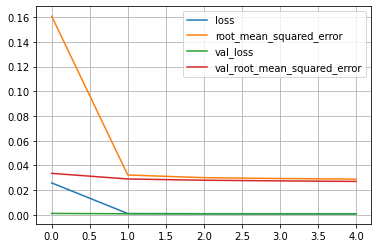

In [220]:
model_hist = model.fit(
    X_train, 
    y_train,
    shuffle = False,
    validation_split = 0.1,
    batch_size = 1,
    epochs = 5,
    verbose = 2
    )

df_model = pd.DataFrame(model_hist.history)
df_model.plot()
plt.grid(True)
plt.show

In [221]:
y_pred = model.predict(X_test, verbose=0)

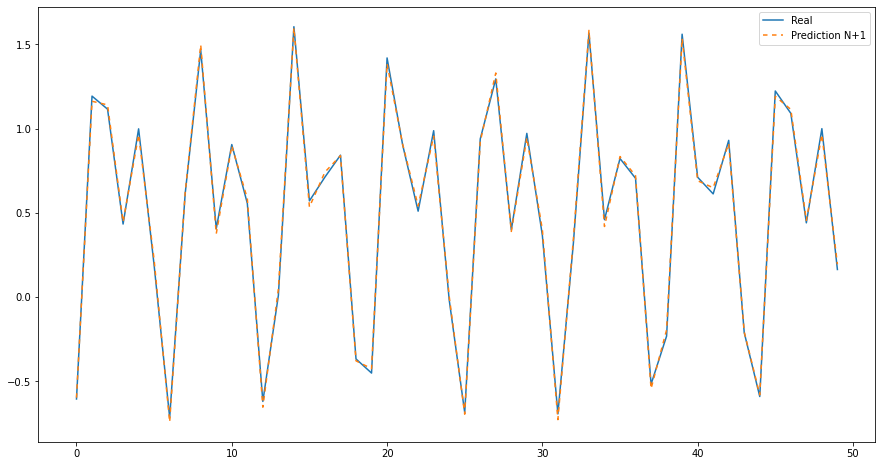

In [231]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)


y_real = Y_test[:50,0]
y_pred_n1 = y_pred[:50,0]

x = range(len(y_real))

line1, = ax.plot(x, y_real, label='Real')
line2, = ax.plot(x, y_pred_n1, dashes=[3, 3], label='Prediction N+1')

ax.legend()
plt.show()

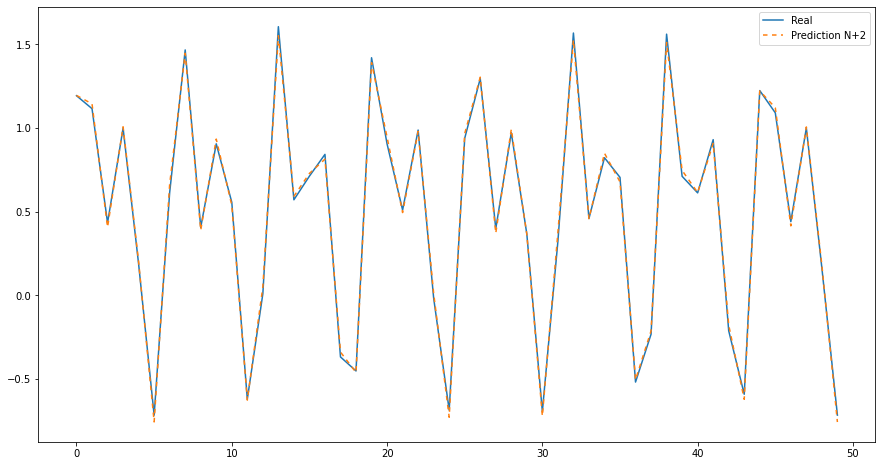

In [230]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)


y_real = Y_test[:50,1]
y_pred_n1 = y_pred[:50,1]

x = range(len(y_real))

line1, = ax.plot(x, y_real, label='Real')
line2, = ax.plot(x, y_pred_n1, dashes=[3, 3], label='Prediction N+2')

ax.legend()
plt.show()

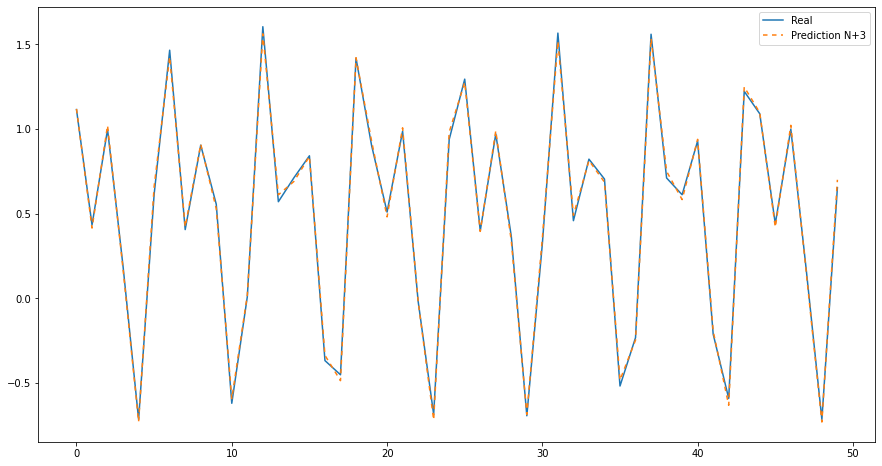

In [229]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)


y_real = Y_test[:50,2]
y_pred_n1 = y_pred[:50,2]

x = range(len(y_real))

line1, = ax.plot(x, y_real, label='Real')
line2, = ax.plot(x, y_pred_n1, dashes=[3, 3], label='Prediction N+3')

ax.legend()
plt.show()